<a href="https://colab.research.google.com/github/pornnakanok/bsc_dpdm22/blob/main/Group_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ตรียมข้อมูลของ กรม อุตุ ([link](https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)) ให้อยู่ในรูปแบบ ตารางด้านล่าง เพื่อเตรียมข้อมูลสำหรับสร้าง Model ทำนาย อุณภูมิต่ำสุดของวันจากค่าอื่นๆ

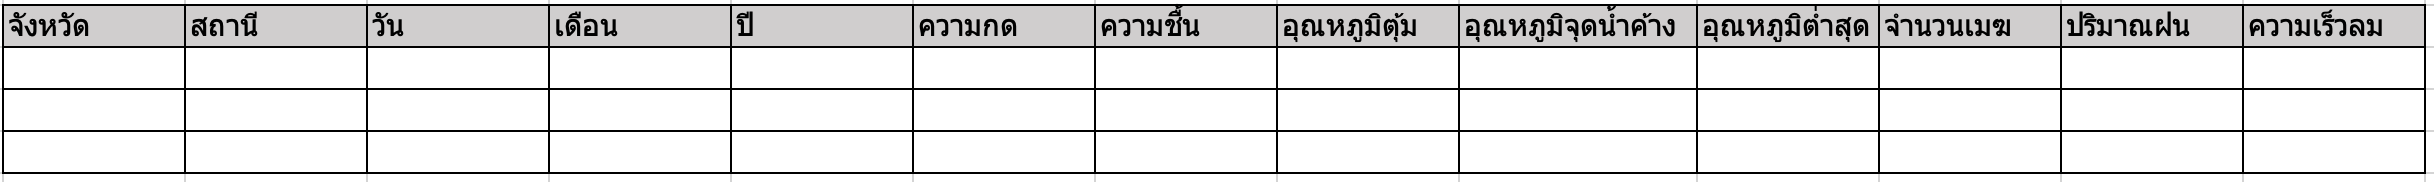

# นำเข้าข้อมูล

In [ ]:
import pandas as pd
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ความกด

In [ ]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)')

!pwd #เช็ค paht ที่กำลังทำงานอยู่
!ls 

/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)
จ.เลย.xlsx  จ.สกลนคร.xlsx  จ.นครพนม.xlsx  จ.หนองคาย.xlsx  จ.ขอนแก่น.xlsx


## ขอนแก่น

In [ ]:
P_kk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
P_kk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
P_kk.head()

,ที่,สถานี,เดือน/ปี,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [ ]:
ST = str(P_kk['เดือน/ปี'])
ST

'0    2011-10-01\n1    2011-11-01\n2    2011-12-01\n3    2012-01-01\n4    2012-02-01\n5    2012-10-01\n6    2012-11-01\n7    2012-12-01\n8    2013-01-01\n9    2013-02-01\n10   2013-10-01\n11   2013-11-01\n12   2013-12-01\n13   2014-01-01\n14   2014-02-01\n15   2014-10-01\n16   2014-11-01\n17   2014-12-01\n18   2015-01-01\n19   2015-02-01\n20   2015-10-01\n21   2015-11-01\n22   2015-12-01\n23   2016-01-01\n24   2016-02-01\n25   2016-10-01\n26   2016-11-01\n27   2016-12-01\n28   2017-01-01\n29   2017-02-01\n30   2017-10-01\n31   2017-11-01\n32   2017-12-01\n33   2018-01-01\n34   2018-02-01\n35   2018-10-01\n36   2018-11-01\n37   2018-12-01\n38   2019-01-01\n39   2019-02-01\n40   2019-10-01\n41   2019-11-01\n42   2019-12-01\n43   2020-01-01\n44   2020-02-01\n45   2020-10-01\n46   2020-11-01\n47   2020-12-01\n48   2021-01-01\n49   2021-02-01\n50   2021-10-01\n51   2021-11-01\n52   2021-12-01\n53   2022-01-01\n54   2022-02-01\nName: เดือน/ปี, dtype: datetime64[ns]'

In [ ]:
ST = str(P_kk['เดือน/ปี']).split('\n') #แยกด้วย \n
ST

In [ ]:
ST = str(P_kk['เดือน/ปี']).split('\n') #แยกด้วย \n
ST.pop() #เอาบรรทัดสุดท้ายก็คือ 'Name: เดือน/ปี, dtype: datetime64[ns]' ออก

'Name: เดือน/ปี, dtype: datetime64[ns]'

In [ ]:
ST

In [ ]:
A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in ST: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ') #แยก index ออก
    A.append(resSp[1])
P_kk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี

In [ ]:
A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in ST: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
P_kk['เดือน'] = A

In [ ]:
A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in ST: # วนลูปใน list
    A.append('ขอนแก่น')
P_kk['จังหวัด'] = A

In [ ]:
P_kk = P_kk[[  'จังหวัด','สถานี','เดือน',  'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
P_kk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1.0,2.0,3.0,4.0,5.0,6.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,...,1010.90,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,11,2011,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,...,1013.63,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,12,2011,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,...,1012.88,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4


In [ ]:
P_kk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49
3,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,4.0,1008.28
4,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,5.0,1009.88
...,...,...,...,...,...,...
1700,ขอนแก่น,352201-หนองคาย จ.หนองคาย,02,2022,27.0,1014.37
1701,ขอนแก่น,352201-หนองคาย จ.หนองคาย,02,2022,28.0,1013.04
1702,ขอนแก่น,352201-หนองคาย จ.หนองคาย,02,2022,29.0,1013.37
1703,ขอนแก่น,352201-หนองคาย จ.หนองคาย,02,2022,30.0,1013.98


In [ ]:
P_kk = P_kk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()

In [ ]:
P_kk.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)

In [ ]:
P_kk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความกด
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49
3,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,4.0,1008.28
4,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,5.0,1009.88


## หนองคาย

In [ ]:
P_nk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
P_nk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
P_nk.head()

,ที่,สถานี,เดือน/ปี,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [ ]:
SNK = str(P_nk['เดือน/ปี']).split('\n')
SNK.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNK: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
P_nk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNK: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
P_nk['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNK: # วนลูปใน list
    A.append('หนองคาย')
P_nk['จังหวัด'] = A


In [ ]:
P_nk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1.0,2.0,3.0,4.0,5.0,6.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,...,1011.17,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18
1,หนองคาย,352201-หนองคาย จ.หนองคาย,11,2011,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,...,1014.32,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-
2,หนองคาย,352201-หนองคาย จ.หนองคาย,12,2011,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,...,1013.91,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19


In [ ]:
P_nk = P_nk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
P_nk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1.0,2.0,3.0,4.0,5.0,6.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,...,1011.17,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18
1,หนองคาย,352201-หนองคาย จ.หนองคาย,11,2011,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,...,1014.32,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-
2,หนองคาย,352201-หนองคาย จ.หนองคาย,12,2011,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,...,1013.91,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19


In [ ]:
P_nk = P_nk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
P_nk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.34
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.67
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.39
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4.0,1008.11
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5.0,1009.69


In [ ]:
P_nk.rename(columns={'level_4': 'วัน', 0 : 'ความกด'}, inplace=True)
P_nk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความกด
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.34
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.67
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.39
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4.0,1008.11
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5.0,1009.69


## นครพนม

In [ ]:
P_np = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
P_np.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
P_np.head(5)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [ ]:
SNP = str(P_np['เดือน/ปี']).split('\n')
SNP.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNP: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
P_np['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNP: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
P_np['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNP: # วนลูปใน list
    A.append('นครพนม')
P_np['จังหวัด'] = A


In [ ]:
P_np = P_np[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
P_np.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,...,1011.24,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28
1,นครพนม,352201-หนองคาย จ.หนองคาย,11,2011,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,...,1014.31,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-
2,นครพนม,352201-หนองคาย จ.หนองคาย,12,2011,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,...,1014.05,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73


In [ ]:
P_np = P_np.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
P_np.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,1,1006.3
1,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,2,1007.38
2,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,3,1008.07
3,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,4,1008.44
4,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,5,1010.51


In [ ]:
P_np.rename(columns={'level_4': 'วัน', 0 : 'ความกด'}, inplace=True)
P_np.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความกด
0,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,1,1006.3
1,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,2,1007.38
2,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,3,1008.07
3,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,4,1008.44
4,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,5,1010.51


## เลย


In [ ]:
P_l = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
P_l.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
P_l.head(5)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


In [ ]:
SL = str(P_l['เดือน/ปี']).split('\n')
SL.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SL: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
P_l['ปี'] = A 

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SL: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
P_l['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SL: # วนลูปใน list
    A.append('เลย')
P_l['จังหวัด'] = A


In [ ]:
P_l = P_l[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
P_l.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,เลย,352201-หนองคาย จ.หนองคาย,10,2011,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,...,1010.98,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71
1,เลย,352201-หนองคาย จ.หนองคาย,11,2011,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,...,1014.21,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-
2,เลย,352201-หนองคาย จ.หนองคาย,12,2011,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,...,1014.34,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62


In [ ]:
P_l = P_l.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
P_l.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,เลย,352201-หนองคาย จ.หนองคาย,10,2011,1,1005.12
1,เลย,352201-หนองคาย จ.หนองคาย,10,2011,2,1006.51
2,เลย,352201-หนองคาย จ.หนองคาย,10,2011,3,1007.81
3,เลย,352201-หนองคาย จ.หนองคาย,10,2011,4,1008.15
4,เลย,352201-หนองคาย จ.หนองคาย,10,2011,5,1009.21


In [ ]:
P_l.rename(columns={'level_4': 'วัน', 0 : 'ความกด'}, inplace=True)
P_l.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความกด
0,เลย,352201-หนองคาย จ.หนองคาย,10,2011,1,1005.12
1,เลย,352201-หนองคาย จ.หนองคาย,10,2011,2,1006.51
2,เลย,352201-หนองคาย จ.หนองคาย,10,2011,3,1007.81
3,เลย,352201-หนองคาย จ.หนองคาย,10,2011,4,1008.15
4,เลย,352201-หนองคาย จ.หนองคาย,10,2011,5,1009.21


## สกลนคร

In [ ]:
P_s = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
P_s.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
P_s.head(5)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


In [ ]:
SS = str(P_s['เดือน/ปี']).split('\n')
SS.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SS: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
P_s['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SS: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
P_s['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SS: # วนลูปใน list
    A.append('สกลนคร')
P_s['จังหวัด'] = A


In [ ]:
P_s = P_s[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
P_s.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,...,1011.36,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21
1,สกลนคร,352201-หนองคาย จ.หนองคาย,11,2011,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,...,1014.41,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-
2,สกลนคร,352201-หนองคาย จ.หนองคาย,12,2011,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,...,1014.07,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63


In [ ]:
P_s = P_s.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
P_s.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,1,1005.84
1,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,2,1007.16
2,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,3,1007.87
3,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,4,1008.56
4,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,5,1010.55


In [ ]:
P_s.rename(columns={'level_4': 'วัน', 0 : 'ความกด'}, inplace=True)
P_s.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความกด
0,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,1,1005.84
1,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,2,1007.16
2,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,3,1007.87
3,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,4,1008.56
4,สกลนคร,352201-หนองคาย จ.หนองคาย,10,2011,5,1010.55


# ความชื้นสัมพัทธ์(เปอร์เซ็นต์)

## ขอนแก่น

In [ ]:
H_kk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
H_kk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
H_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [ ]:
SKK = str(H_kk['เดือน/ปี']).split('\n')
SKK.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SKK: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
H_kk['ปี'] = A 

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SKK: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
H_kk['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SKK: # วนลูปใน list
    A.append('ขอนแก่น')
H_kk['จังหวัด'] = A


In [ ]:
H_kk = H_kk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
H_kk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,83,92,86,80,86,86,...,73,73,72,73,69,69,75,71,71,68
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,11,2011,71,65,68,65,65,68,...,69,65,66,65,67,68,67,67,65,-
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,12,2011,66,61,61,62,61,60,...,64,63,62,60,60,62,65,66,63,64


In [ ]:
H_kk = H_kk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
H_kk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,83
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,92
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,86
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,80
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,86


In [ ]:
H_kk.rename(columns={'level_4': 'วัน', 0 : 'ความชื้น'}, inplace=True)
H_kk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความชื้น
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,83
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,92
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,86
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,80
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,86


## หนองคาย

In [ ]:
H_nk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
H_nk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
H_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


In [ ]:
SNK = str(H_nk['เดือน/ปี']).split('\n')
SNK.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNK: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
H_nk['ปี'] = A 

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNK: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
H_nk['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNK: # วนลูปใน list
    A.append('หนองคาย')
H_nk['จังหวัด'] = A


In [ ]:
H_nk = H_nk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
H_nk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,89,91,78,75,90,88,...,71,76,73,68,71,70,71,70,66,68
1,หนองคาย,352201-หนองคาย จ.หนองคาย,11,2011,68,66,66,67,68,69,...,63,60,64,65,67,68,69,71,69,-
2,หนองคาย,352201-หนองคาย จ.หนองคาย,12,2011,67,62,66,66,65,68,...,66,65,56,61,58,67,71,70,67,68


In [ ]:
H_nk = H_nk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
H_nk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,89
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,91
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,78
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,75
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,90


In [ ]:
H_nk.rename(columns={'level_4': 'วัน', 0 : 'ความชื้น'}, inplace=True)
H_nk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความชื้น
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,89
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,91
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,78
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,75
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,90


## นครพนม

In [ ]:
H_np = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
H_np.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
H_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


In [ ]:
SNP = str(H_np['เดือน/ปี']).split('\n')
SNP.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNP: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
H_np['ปี'] = A 

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNP: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
H_np['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in SNP: # วนลูปใน list
    A.append('นครพนม')
H_np['จังหวัด'] = A


In [ ]:
H_np = H_np[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
H_np.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,95,84,74,72,87,88,...,68,66,67,70,69,71,66,72,70,69
1,นครพนม,357201-นครพนม จ.นครพนม,11,2011,69,67,70,68,71,68,...,72,66,66,70,78,74,69,66,65,-
2,นครพนม,357201-นครพนม จ.นครพนม,12,2011,64,56,62,67,69,77,...,67,66,54,60,61,70,71,63,66,70


In [ ]:
H_np = H_np.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
H_np.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,95
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,84
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,74
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,72
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,87


In [ ]:
H_np.rename(columns={'level_4': 'วัน', 0 : 'ความชื้น'}, inplace=True)
H_np.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความชื้น
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,95
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,84
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,74
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,72
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,87


## เลย

In [ ]:
H_l = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
H_l.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
H_l.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


In [ ]:
SL = str(H_l['เดือน/ปี']).split('\n')
SL.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in SL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
H_l['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in SL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
H_l['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in SL: # วนลูปใน list_path
    A.append('เลย')
H_l['จังหวัด'] = A


In [ ]:
H_l = H_l[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
H_l.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,เลย,353301-เลย สกษ. จ.เลย,10,2011,90,95,92,89,86,94,...,85,85,86,83,84,85,85,82,83,85
1,เลย,353301-เลย สกษ. จ.เลย,11,2011,85,83,84,83,83,85,...,84,73,77,80,81,80,84,82,79,-
2,เลย,353301-เลย สกษ. จ.เลย,12,2011,80,77,77,76,78,83,...,82,80,74,75,74,80,80,78,81,78


In [ ]:
H_l = H_l.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
H_l.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,เลย,353301-เลย สกษ. จ.เลย,10,2011,1,90
1,เลย,353301-เลย สกษ. จ.เลย,10,2011,2,95
2,เลย,353301-เลย สกษ. จ.เลย,10,2011,3,92
3,เลย,353301-เลย สกษ. จ.เลย,10,2011,4,89
4,เลย,353301-เลย สกษ. จ.เลย,10,2011,5,86


In [ ]:
H_l.rename(columns={'level_4': 'วัน', 0 : 'ความชื้น'}, inplace=True)
H_l.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความชื้น
0,เลย,353301-เลย สกษ. จ.เลย,10,2011,1,90
1,เลย,353301-เลย สกษ. จ.เลย,10,2011,2,95
2,เลย,353301-เลย สกษ. จ.เลย,10,2011,3,92
3,เลย,353301-เลย สกษ. จ.เลย,10,2011,4,89
4,เลย,353301-เลย สกษ. จ.เลย,10,2011,5,86


## สกลนคร

In [ ]:
H_s = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
H_s.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
H_s.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


In [ ]:
SS = str(H_s['เดือน/ปี']).split('\n')
SS.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in SS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
H_s['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in SS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
H_s['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in SS: # วนลูปใน list_path
    A.append('สกลนคร')
H_s['จังหวัด'] = A


In [ ]:
H_s = H_s[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
H_s.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,87,88,77,75,87,86,...,70,74,73,73,72,72,70,74,73,72
1,สกลนคร,356201-สกลนคร จ.สกลนคร,11,2011,71,71,71,72,73,70,...,72,68,66,71,71,70,70,69,69,-
2,สกลนคร,356201-สกลนคร จ.สกลนคร,12,2011,66,61,64,67,70,73,...,68,69,65,64,62,69,69,69,69,68


In [ ]:
H_s = H_s.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
H_s.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,87
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,88
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,77
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,75
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,87


In [ ]:
H_s.rename(columns={'level_4': 'วัน', 0 : 'ความชื้น'}, inplace=True)
H_s.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความชื้น
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,87
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,88
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,77
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,75
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,87


# ความเร็วลม

## ขอนแก่น

In [ ]:
W_kk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
W_kk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
W_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [ ]:
WKK = str(W_kk['เดือน/ปี']).split('\n')
WKK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
W_kk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
W_kk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WKK: # วนลูปใน list_path
    A.append('ขอนแก่น')
W_kk['จังหวัด'] = A


In [ ]:
W_kk = W_kk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
W_kk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,3,2,3,2,2,3,...,3,2,3,5,5,5,4,6,4,5
1,ขอนแก่น,353301-เลย สกษ. จ.เลย,11,2011,4,5,3,3,5,2,...,5,7,6,5,5,3,1,3,3,-
2,ขอนแก่น,353301-เลย สกษ. จ.เลย,12,2011,3,4,4,4,4,4,...,4,5,6,7,6,5,4,4,6,5


In [ ]:
W_kk = W_kk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
W_kk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,1,3
1,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,2,2
2,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,3,3
3,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,5,2


In [ ]:
W_kk.rename(columns={'level_4': 'วัน', 0 : 'ความเร็วลม'}, inplace=True)
W_kk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความเร็วลม
0,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,1,3
1,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,2,2
2,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,3,3
3,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,5,2


## หนองคาย

In [ ]:
W_nk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
W_nk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
W_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [ ]:
WNK = str(W_nk['เดือน/ปี']).split('\n')
WNK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
W_nk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
W_nk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WNK: # วนลูปใน list_path
    A.append('หนองคาย')
W_nk['จังหวัด'] = A


In [ ]:
W_nk = W_nk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
W_nk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,1,4,4,2,1,3,...,2,2,2,3,3,3,3,3,3,4
1,หนองคาย,353301-เลย สกษ. จ.เลย,11,2011,3,3,3,2,2,1,...,4,7,4,2,3,2,2,2,2,-
2,หนองคาย,353301-เลย สกษ. จ.เลย,12,2011,2,5,3,2,2,2,...,3,3,6,5,4,2,2,2,3,2


In [ ]:
W_nk = W_nk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
W_nk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,1,1
1,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,2,4
2,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,3,4
3,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,5,1


In [ ]:
W_nk.rename(columns={'level_4': 'วัน', 0 : 'ความเร็วลม'}, inplace=True)
W_nk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความเร็วลม
0,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,1,1
1,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,2,4
2,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,3,4
3,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,5,1


## นครพนม

In [ ]:
W_np = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
W_np.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
W_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [ ]:
WNP = str(W_np['เดือน/ปี']).split('\n')
WNP.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
W_np['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
W_np['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WNP: # วนลูปใน list_path
    A.append('นครพนม')
W_np['จังหวัด'] = A


In [ ]:
W_np = W_np[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
W_np.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,1,1,2,2,1,0,...,1,1,2,2,1,2,2,1,1,1
1,นครพนม,353301-เลย สกษ. จ.เลย,11,2011,1,1,1,1,1,1,...,2,3,3,2,2,1,1,1,1,-
2,นครพนม,353301-เลย สกษ. จ.เลย,12,2011,1,2,2,1,1,1,...,1,1,3,3,1,2,1,1,2,2


In [ ]:
W_np = W_np.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
W_np.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,1,1
1,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,2,1
2,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,3,2
3,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,5,1


In [ ]:
W_np.rename(columns={'level_4': 'วัน', 0 : 'ความเร็วลม'}, inplace=True)
W_np.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความเร็วลม
0,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,1,1
1,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,2,1
2,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,3,2
3,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,5,1


## เลย

In [ ]:
W_l = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
W_l.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
W_l.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


In [ ]:
WL = str(W_l['เดือน/ปี']).split('\n')
WL.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
W_l['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
W_l['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WL: # วนลูปใน list_path
    A.append('เลย')
W_l['จังหวัด'] = A


In [ ]:
W_l = W_l[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
W_l.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,เลย,353301-เลย สกษ. จ.เลย,10,2011,2,2,3,2,3,2,...,1,1,1,2,2,1,2,2,2,1
1,เลย,353301-เลย สกษ. จ.เลย,11,2011,1,2,1,1,2,2,...,2,3,2,1,1,2,1,2,1,-
2,เลย,353301-เลย สกษ. จ.เลย,12,2011,2,2,3,2,1,2,...,2,1,2,3,2,1,2,1,2,2


In [ ]:
W_l = W_l.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
W_l.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,เลย,353301-เลย สกษ. จ.เลย,10,2011,1,2
1,เลย,353301-เลย สกษ. จ.เลย,10,2011,2,2
2,เลย,353301-เลย สกษ. จ.เลย,10,2011,3,3
3,เลย,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,เลย,353301-เลย สกษ. จ.เลย,10,2011,5,3


In [ ]:
W_l.rename(columns={'level_4': 'วัน', 0 : 'ความเร็วลม'}, inplace=True)
W_l.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความเร็วลม
0,เลย,353301-เลย สกษ. จ.เลย,10,2011,1,2
1,เลย,353301-เลย สกษ. จ.เลย,10,2011,2,2
2,เลย,353301-เลย สกษ. จ.เลย,10,2011,3,3
3,เลย,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,เลย,353301-เลย สกษ. จ.เลย,10,2011,5,3


## สกลนคร

In [ ]:
W_s = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
W_s.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
W_s.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [ ]:
WS = str(W_s['เดือน/ปี']).split('\n')
WS.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
W_s['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
W_s['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in WS: # วนลูปใน list_path
    A.append('สกลนคร')
W_s['จังหวัด'] = A


In [ ]:
W_s = W_s[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
W_s.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,1,1,2,2,1,0,...,1,1,2,2,1,2,2,1,1,1
1,สกลนคร,353301-เลย สกษ. จ.เลย,11,2011,1,1,1,1,1,1,...,2,3,3,2,2,1,1,1,1,-
2,สกลนคร,353301-เลย สกษ. จ.เลย,12,2011,1,2,2,1,1,1,...,1,1,3,3,1,2,1,1,2,2


In [ ]:
W_s = W_s.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
W_s.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,1,1
1,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,2,1
2,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,3,2
3,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,5,1


In [ ]:
W_s.rename(columns={'level_4': 'วัน', 0 : 'ความเร็วลม'}, inplace=True)
W_s.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ความเร็วลม
0,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,1,1
1,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,2,1
2,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,3,2
3,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,4,2
4,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,5,1


# จำนวนเมฆ(10ส่วน)

## ขอนแก่น

In [ ]:
C_kk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
C_kk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
C_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


In [ ]:
CKK = str(C_kk['เดือน/ปี']).split('\n')
CKK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
C_kk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
C_kk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CKK: # วนลูปใน list_path
    A.append('ขอนแก่น')
C_kk['จังหวัด'] = A


In [ ]:
C_kk = C_kk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
C_kk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,9,10,10,8,10,10,...,3,2,3,5,3,3,5,4,2,2
1,ขอนแก่น,353301-เลย สกษ. จ.เลย,11,2011,2,2,2,2,3,6,...,5,6,6,3,2,2,1,3,2,-
2,ขอนแก่น,353301-เลย สกษ. จ.เลย,12,2011,2,3,4,4,5,8,...,4,5,5,3,3,1,2,1,1,1


In [ ]:
C_kk = C_kk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
C_kk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,1,9
1,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,2,10
2,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,3,10
3,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,4,8
4,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,5,10


In [ ]:
C_kk.rename(columns={'level_4': 'วัน', 0 : 'จำนวนเมฆ'}, inplace=True)
C_kk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,จำนวนเมฆ
0,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,1,9
1,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,2,10
2,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,3,10
3,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,4,8
4,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,5,10


## หนองคาย

In [ ]:
C_nk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
C_nk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
C_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571


In [ ]:
CNK = str(C_nk['เดือน/ปี']).split('\n')
CNK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
C_nk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
C_nk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CNK: # วนลูปใน list_path
    A.append('หนองคาย')
C_nk['จังหวัด'] = A


In [ ]:
C_nk = C_nk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
C_nk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,10,10,8,9,9,10,...,1,3,1,1,2,1,1,1,4,3
1,หนองคาย,353301-เลย สกษ. จ.เลย,11,2011,1,0,0,1,1,2,...,6,6,6,-,0,1,2,4,2,-
2,หนองคาย,353301-เลย สกษ. จ.เลย,12,2011,4,4,-,2,7,5,...,1,2,8,1,-,3,1,1,3,-


In [ ]:
C_nk = C_nk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
C_nk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,1,10
1,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,2,10
2,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,3,8
3,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,4,9
4,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,5,9


In [ ]:
C_nk.rename(columns={'level_4': 'วัน', 0 : 'จำนวนเมฆ'}, inplace=True)
C_nk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,จำนวนเมฆ
0,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,1,10
1,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,2,10
2,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,3,8
3,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,4,9
4,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,5,9


## นครพนม

In [ ]:
C_np = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
C_np.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
C_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


In [ ]:
CNP = str(C_np['เดือน/ปี']).split('\n')
CNP.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
C_np['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
C_np['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CNP: # วนลูปใน list_path
    A.append('นครพนม')
C_np['จังหวัด'] = A


In [ ]:
C_np = C_np[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
C_np.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,10,7,8,8,10,10,...,2,2,2,2,2,3,3,4,2,4
1,นครพนม,353301-เลย สกษ. จ.เลย,11,2011,2,2,2,3,5,7,...,4,4,4,4,2,2,2,1,1,-
2,นครพนม,353301-เลย สกษ. จ.เลย,12,2011,2,2,2,4,4,7,...,4,4,2,2,2,2,1,2,1,1


In [ ]:
C_np = C_np.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
C_np.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,1,10
1,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,2,7
2,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,3,8
3,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,4,8
4,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,5,10


In [ ]:
C_np.rename(columns={'level_4': 'วัน', 0 : 'จำนวนเมฆ'}, inplace=True)
C_np.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,จำนวนเมฆ
0,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,1,10
1,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,2,7
2,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,3,8
3,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,4,8
4,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,5,10


## เลย

In [ ]:
C_l = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
C_l.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
C_l.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
CL = str(C_l['เดือน/ปี']).split('\n')
CL.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
C_l['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
C_l['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CL: # วนลูปใน list_path
    A.append('เลย')
C_l['จังหวัด'] = A


In [ ]:
C_l = C_l[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
C_l.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,เลย,353301-เลย สกษ. จ.เลย,10,2011,8,10,10,9,8,10,...,2,1,1,2,4,2,3,3,1,2
1,เลย,353301-เลย สกษ. จ.เลย,11,2011,2,1,2,1,1,1,...,6,6,4,0,1,2,2,5,3,-
2,เลย,353301-เลย สกษ. จ.เลย,12,2011,1,3,1,3,3,2,...,3,3,1,1,0,0,1,1,4,1


In [ ]:
C_l = C_l.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
C_l.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,เลย,353301-เลย สกษ. จ.เลย,10,2011,1,8
1,เลย,353301-เลย สกษ. จ.เลย,10,2011,2,10
2,เลย,353301-เลย สกษ. จ.เลย,10,2011,3,10
3,เลย,353301-เลย สกษ. จ.เลย,10,2011,4,9
4,เลย,353301-เลย สกษ. จ.เลย,10,2011,5,8


In [ ]:
C_l.rename(columns={'level_4': 'วัน', 0 : 'จำนวนเมฆ'}, inplace=True)
C_l.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,จำนวนเมฆ
0,เลย,353301-เลย สกษ. จ.เลย,10,2011,1,8
1,เลย,353301-เลย สกษ. จ.เลย,10,2011,2,10
2,เลย,353301-เลย สกษ. จ.เลย,10,2011,3,10
3,เลย,353301-เลย สกษ. จ.เลย,10,2011,4,9
4,เลย,353301-เลย สกษ. จ.เลย,10,2011,5,8


## สกลนคร

In [ ]:
C_s = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
C_s.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
C_s.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857


In [ ]:
CS = str(C_s['เดือน/ปี']).split('\n')
CS.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
C_s['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
C_s['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CS: # วนลูปใน list_path
    A.append('สกลนคร')
C_s['จังหวัด'] = A


In [ ]:
C_s = C_s[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
C_s.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,9,9,7,7,9,10,...,1,2,1,2,1,1,3,3,1,4
1,สกลนคร,353301-เลย สกษ. จ.เลย,11,2011,2,0,0,1,3,7,...,6,4,3,1,1,1,1,1,0,-
2,สกลนคร,353301-เลย สกษ. จ.เลย,12,2011,1,1,2,2,2,6,...,3,3,2,-,0,0,0,0,1,-


In [ ]:
C_s = C_s.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
C_s.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,1,9
1,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,2,9
2,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,3,7
3,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,4,7
4,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,5,9


In [ ]:
C_s.rename(columns={'level_4': 'วัน', 0 : 'จำนวนเมฆ'}, inplace=True)
C_s.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,จำนวนเมฆ
0,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,1,9
1,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,2,9
2,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,3,7
3,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,4,7
4,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,5,9


# ปริมาณฝน(มิลลิเมตร)

## ขอนแก่น

In [ ]:
R_kk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
R_kk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
R_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [ ]:
RKK = str(R_kk['เดือน/ปี']).split('\n')
RKK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
R_kk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
R_kk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RKK: # วนลูปใน list_path
    A.append('ขอนแก่น')
R_kk['จังหวัด'] = A


In [ ]:
R_kk = R_kk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
R_kk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1.4,17.7,3,0,2.2,0.5,...,0,0,0,T,0,0.5,1.1,0,0,0
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,11,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
R_kk = R_kk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
R_kk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,1.4
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,17.7
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,3
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,0
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,2.2


In [ ]:
R_kk.rename(columns={'level_4': 'วัน', 0 : 'ปริมาณฝน'}, inplace=True)
R_kk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ปริมาณฝน
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,1.4
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,17.7
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,3
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,0
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,2.2


## หนองคาย

In [ ]:
R_nk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
R_nk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
R_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


In [ ]:
RNK = str(R_nk['เดือน/ปี']).split('\n')
RNK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
R_nk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
R_nk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RNK: # วนลูปใน list_path
    A.append('หนองคาย')
R_nk['จังหวัด'] = A


In [ ]:
R_nk = R_nk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
R_nk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,48.6,59,0,1,19.1,6.2,...,0,0,0,0,0,0,0,0,0,0
1,หนองคาย,352201-หนองคาย จ.หนองคาย,11,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
2,หนองคาย,352201-หนองคาย จ.หนองคาย,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
R_nk = R_nk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
R_nk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,48.6
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,59
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,0
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,1
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,19.1


In [ ]:
R_nk.rename(columns={'level_4': 'วัน', 0 : 'ปริมาณฝน'}, inplace=True)
R_nk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ปริมาณฝน
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,48.6
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,59
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,0
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,1
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,19.1


## นครพนม

In [ ]:
R_np = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
R_np.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
R_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


In [ ]:
RNP = str(R_np['เดือน/ปี']).split('\n')
RNP.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
R_np['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
R_np['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RNP: # วนลูปใน list_path
    A.append('นครพนม')
R_np['จังหวัด'] = A


In [ ]:
R_np = R_np[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
R_np.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,17,0.3,0,0.3,1.9,T,...,0,0,0,0,0,0,0,0,0,0
1,นครพนม,357201-นครพนม จ.นครพนม,11,2011,0,0,0,0,T,T,...,T,0,0,0,0,0.5,0,0,0,-
2,นครพนม,357201-นครพนม จ.นครพนม,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
R_np = R_np.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
R_np.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,17
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,0.3
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,0
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,0.3
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,1.9


In [ ]:
R_np.rename(columns={'level_4': 'วัน', 0 : 'ปริมาณฝน'}, inplace=True)
R_np.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ปริมาณฝน
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,17
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,0.3
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,0
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,0.3
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,1.9


## เลย

In [ ]:
R_l = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
R_l.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
R_l.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


In [ ]:
RL = str(R_l['เดือน/ปี']).split('\n')
RL.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
R_l['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
R_l['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RL: # วนลูปใน list_path
    A.append('เลย')
R_l['จังหวัด'] = A


In [ ]:
R_l = R_l[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
R_l.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,เลย,353201-เลย จ.เลย,10,2011,21.6,111.4,0.4,0,0,3.4,...,0,0,0,0,0,0,0.2,0,0,0
1,เลย,353201-เลย จ.เลย,11,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0.6,0,0,-
2,เลย,353201-เลย จ.เลย,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
R_l = R_l.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
R_l.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,เลย,353201-เลย จ.เลย,10,2011,1,21.6
1,เลย,353201-เลย จ.เลย,10,2011,2,111.4
2,เลย,353201-เลย จ.เลย,10,2011,3,0.4
3,เลย,353201-เลย จ.เลย,10,2011,4,0
4,เลย,353201-เลย จ.เลย,10,2011,5,0


In [ ]:
R_l.rename(columns={'level_4': 'วัน', 0 : 'ปริมาณฝน'}, inplace=True)
R_l.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ปริมาณฝน
0,เลย,353201-เลย จ.เลย,10,2011,1,21.6
1,เลย,353201-เลย จ.เลย,10,2011,2,111.4
2,เลย,353201-เลย จ.เลย,10,2011,3,0.4
3,เลย,353201-เลย จ.เลย,10,2011,4,0
4,เลย,353201-เลย จ.เลย,10,2011,5,0


## สกลนคร

In [ ]:
R_s = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
R_s.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
R_s.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


In [ ]:
RS = str(R_s['เดือน/ปี']).split('\n')
RS.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
R_s['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
R_s['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in RS: # วนลูปใน list_path
    A.append('สกลนคร')
R_s['จังหวัด'] = A


In [ ]:
R_s = R_s[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
R_s.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,84.8,28.1,0,T,5.5,0.3,...,0,0,0,0,0,0,0,1,0,0
1,สกลนคร,356201-สกลนคร จ.สกลนคร,11,2011,0,0,0,0,T,T,...,0,0,0,0,0,0,0,0,0,-
2,สกลนคร,356201-สกลนคร จ.สกลนคร,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
R_s = R_s.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
R_s.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,84.8
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,28.1
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,0
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,T
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,5.5


In [ ]:
R_s.rename(columns={'level_4': 'วัน', 0 : 'ปริมาณฝน'}, inplace=True)
R_s.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,ปริมาณฝน
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,84.8
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,28.1
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,0
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,T
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,5.5


# อุณหภูมิจุดน้ำค้าง(เซลเซียส)

## ขอนแก่น

In [ ]:
Cs_kk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Cs_kk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Cs_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [ ]:
CsKK = str(Cs_kk['เดือน/ปี']).split('\n')
CsKK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Cs_kk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Cs_kk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsKK: # วนลูปใน list_path
    A.append('ขอนแก่น')
Cs_kk['จังหวัด'] = A


In [ ]:
Cs_kk = Cs_kk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Cs_kk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,24.2,24.0,22.9,21.9,21.7,21.3,...,20.8,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,11,2011,20.2,18.5,19.4,19.0,19.2,20.6,...,20.1,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,12,2011,17.7,15.3,12.7,14.0,14.6,16.6,...,16.2,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3


In [ ]:
Cs_kk = Cs_kk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Cs_kk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,24.2
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,24.0
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,22.9
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,21.9
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,21.7


In [ ]:
Cs_kk.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
Cs_kk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิจุดน้ำค้าง
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,24.2
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,24.0
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,22.9
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,21.9
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,21.7


## หนองคาย

In [ ]:
Cs_nk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Cs_nk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Cs_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


In [ ]:
CsNK = str(Cs_nk['เดือน/ปี']).split('\n')
CsNK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Cs_nk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Cs_nk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsNK: # วนลูปใน list_path
    A.append('หนองคาย')
Cs_nk['จังหวัด'] = A


In [ ]:
Cs_nk = Cs_nk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Cs_nk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,24.6,23.8,22.4,21.9,23.3,22.0,...,21.1,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3
1,หนองคาย,352201-หนองคาย จ.หนองคาย,11,2011,19.3,19.0,18.7,19.1,20.2,20.7,...,19.0,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-
2,หนองคาย,352201-หนองคาย จ.หนองคาย,12,2011,18.4,15.5,14.4,14.6,15.6,17.7,...,15.5,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7


In [ ]:
Cs_nk = Cs_nk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Cs_nk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,24.6
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,23.8
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,22.4
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,21.9
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,23.3


In [ ]:
Cs_nk.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
Cs_nk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิจุดน้ำค้าง
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,24.6
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,23.8
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,22.4
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,21.9
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,23.3


## นครพนม

In [ ]:
Cs_np = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Cs_np.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Cs_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


In [ ]:
CsNP = str(Cs_np['เดือน/ปี']).split('\n')
CsNP.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Cs_np['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Cs_np['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsNP: # วนลูปใน list_path
    A.append('นครพนม')
Cs_np['จังหวัด'] = A


In [ ]:
Cs_np = Cs_np[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Cs_np.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,25.1,23.1,20.1,18.9,20.7,21.1,...,19.4,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3
1,นครพนม,357201-นครพนม จ.นครพนม,11,2011,19.2,18.8,19.1,19.8,20.3,20.9,...,20.2,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-
2,นครพนม,357201-นครพนม จ.นครพนม,12,2011,17.6,12.7,12.2,14.1,16.0,18.5,...,15.7,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7


In [ ]:
Cs_np = Cs_np.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Cs_np.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,25.1
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,23.1
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,20.1
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,18.9
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,20.7


In [ ]:
Cs_np.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
Cs_np.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิจุดน้ำค้าง
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,25.1
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,23.1
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,20.1
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,18.9
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,20.7


## เลย

In [ ]:
Cs_l = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Cs_l.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Cs_l.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


In [ ]:
CsL = str(Cs_l['เดือน/ปี']).split('\n')
CsL.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Cs_l['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Cs_l['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsL: # วนลูปใน list_path
    A.append('เลย')
Cs_l['จังหวัด'] = A


In [ ]:
Cs_l = Cs_l[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Cs_l.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,เลย,353201-เลย จ.เลย,10,2011,23.6,23.5,21.9,21.9,21.8,21.6,...,21.0,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2
1,เลย,353201-เลย จ.เลย,11,2011,20.1,19.5,19.5,19.1,19.5,20.5,...,20.0,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-
2,เลย,353201-เลย จ.เลย,12,2011,18.0,16.6,15.0,14.6,15.3,16.7,...,15.9,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5


In [ ]:
Cs_l = Cs_l.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Cs_l.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,เลย,353201-เลย จ.เลย,10,2011,1,23.6
1,เลย,353201-เลย จ.เลย,10,2011,2,23.5
2,เลย,353201-เลย จ.เลย,10,2011,3,21.9
3,เลย,353201-เลย จ.เลย,10,2011,4,21.9
4,เลย,353201-เลย จ.เลย,10,2011,5,21.8


In [ ]:
Cs_l.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
Cs_l.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิจุดน้ำค้าง
0,เลย,353201-เลย จ.เลย,10,2011,1,23.6
1,เลย,353201-เลย จ.เลย,10,2011,2,23.5
2,เลย,353201-เลย จ.เลย,10,2011,3,21.9
3,เลย,353201-เลย จ.เลย,10,2011,4,21.9
4,เลย,353201-เลย จ.เลย,10,2011,5,21.8


## สกลนคร

In [ ]:
Cs_s = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Cs_s.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Cs_s.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


In [ ]:
CsS = str(Cs_s['เดือน/ปี']).split('\n')
CsS.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Cs_s['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Cs_s['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in CsS: # วนลูปใน list_path
    A.append('สกลนคร')
Cs_s['จังหวัด'] = A


In [ ]:
Cs_s = Cs_s[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Cs_s.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,24.5,23.6,21.1,20.0,21.2,20.8,...,19.3,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7
1,สกลนคร,356201-สกลนคร จ.สกลนคร,11,2011,19.6,19.4,19.5,20.0,20.9,21.4,...,20.3,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-
2,สกลนคร,356201-สกลนคร จ.สกลนคร,12,2011,18.0,14.0,12.3,14.1,15.7,18.1,...,16.0,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5


In [ ]:
Cs_s = Cs_s.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Cs_s.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,24.5
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,23.6
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,21.1
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,20.0
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,21.2


In [ ]:
Cs_s.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
Cs_s.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิจุดน้ำค้าง
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,24.5
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,23.6
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,21.1
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,20.0
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,21.2


# อุณหภูมิต่ำสุด(เซลเซียส)

## ขอนแก่น

In [ ]:
Clow_kk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Clow_kk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Clow_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


In [ ]:
ClowKK = str(Clow_kk['เดือน/ปี']).split('\n')
ClowKK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Clow_kk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Clow_kk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowKK: # วนลูปใน list_path
    A.append('ขอนแก่น')
Clow_kk['จังหวัด'] = A


In [ ]:
Clow_kk = Clow_kk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Clow_kk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,24.8,23.0,22.1,22.8,23.1,21.7,...,21.6,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,11,2011,20.7,20.4,20.5,20.9,20.6,22.2,...,21.4,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,12,2011,19.3,18.9,15.4,15.6,16.3,20.2,...,17.6,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17


In [ ]:
Clow_kk = Clow_kk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Clow_kk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,24.8
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,23.0
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,22.1
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,22.8
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,23.1


In [ ]:
Clow_kk.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิต่ำสุด'}, inplace=True)
Clow_kk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิต่ำสุด
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,24.8
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,23.0
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,22.1
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,22.8
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,23.1


## หนองคาย

In [ ]:
Clow_nk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Clow_nk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Clow_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


In [ ]:
ClowNK = str(Clow_nk['เดือน/ปี']).split('\n')
ClowNK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Clow_nk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Clow_nk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowNK: # วนลูปใน list_path
    A.append('หนองคาย')
Clow_nk['จังหวัด'] = A


In [ ]:
Clow_nk = Clow_nk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Clow_nk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,25.3,23.3,23.6,23.8,23.3,22.0,...,22.7,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4
1,หนองคาย,352201-หนองคาย จ.หนองคาย,11,2011,21.2,21.4,21.0,21.3,22.0,22.6,...,22.0,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-
2,หนองคาย,352201-หนองคาย จ.หนองคาย,12,2011,20.0,20.1,15.0,15.5,17.2,18.8,...,17.2,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5


In [ ]:
Clow_nk = Clow_nk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Clow_nk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,25.3
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,23.3
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,23.6
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,23.8
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,23.3


In [ ]:
Clow_nk.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิต่ำสุด'}, inplace=True)
Clow_nk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิต่ำสุด
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,25.3
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,23.3
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,23.6
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,23.8
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,23.3


## นครพนม

In [ ]:
Clow_np = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Clow_np.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Clow_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


In [ ]:
ClowNP = str(Clow_np['เดือน/ปี']).split('\n')
ClowNP.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Clow_np['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Clow_np['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowNP: # วนลูปใน list_path
    A.append('นครพนม')
Clow_np['จังหวัด'] = A


In [ ]:
Clow_np = Clow_np[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Clow_np.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,25.0,23.4,22.2,20.6,21.1,21.0,...,21,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21
1,นครพนม,357201-นครพนม จ.นครพนม,11,2011,20.4,20.5,19.7,20.6,21.3,23.7,...,21.5,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-
2,นครพนม,357201-นครพนม จ.นครพนม,12,2011,19.4,19.8,14.1,14.5,15,18.1,...,17.7,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8


In [ ]:
Clow_np = Clow_np.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Clow_np.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,25.0
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,23.4
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,22.2
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,20.6
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,21.1


In [ ]:
Clow_np.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิต่ำสุด'}, inplace=True)
Clow_np.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิต่ำสุด
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,25.0
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,23.4
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,22.2
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,20.6
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,21.1


## เลย

In [ ]:
Clow_l = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Clow_l.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Clow_l.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6


In [ ]:
ClowL = str(Clow_l['เดือน/ปี']).split('\n')
ClowL.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Clow_l['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Clow_l['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowL: # วนลูปใน list_path
    A.append('เลย')
Clow_l['จังหวัด'] = A


In [ ]:
Clow_l = Clow_l[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Clow_l.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,เลย,353201-เลย จ.เลย,10,2011,23.5,24.3,22.5,23.0,22.7,23.2,...,21.0,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5
1,เลย,353201-เลย จ.เลย,11,2011,20.7,19.9,19.1,19.0,19.5,19.8,...,20.5,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-
2,เลย,353201-เลย จ.เลย,12,2011,18,19.6,15.5,14.4,17.1,15.5,...,15.0,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4


In [ ]:
Clow_l = Clow_l.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Clow_l.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,เลย,353201-เลย จ.เลย,10,2011,1,23.5
1,เลย,353201-เลย จ.เลย,10,2011,2,24.3
2,เลย,353201-เลย จ.เลย,10,2011,3,22.5
3,เลย,353201-เลย จ.เลย,10,2011,4,23.0
4,เลย,353201-เลย จ.เลย,10,2011,5,22.7


In [ ]:
Clow_l.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิต่ำสุด'}, inplace=True)
Clow_l.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิต่ำสุด
0,เลย,353201-เลย จ.เลย,10,2011,1,23.5
1,เลย,353201-เลย จ.เลย,10,2011,2,24.3
2,เลย,353201-เลย จ.เลย,10,2011,3,22.5
3,เลย,353201-เลย จ.เลย,10,2011,4,23.0
4,เลย,353201-เลย จ.เลย,10,2011,5,22.7


## สกลนคร

In [ ]:
Clow_s = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
Clow_s.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
Clow_s.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0


In [ ]:
ClowS = str(Clow_s['เดือน/ปี']).split('\n')
ClowS.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Clow_s['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
Clow_s['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in ClowS: # วนลูปใน list_path
    A.append('สกลนคร')
Clow_s['จังหวัด'] = A


In [ ]:
Clow_s = Clow_s[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
Clow_s.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,24.5,23.1,22.6,21.8,22.5,21.1,...,21.1,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7
1,สกลนคร,356201-สกลนคร จ.สกลนคร,11,2011,20.5,20.5,20.4,20.6,21.5,24.0,...,22.0,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-
2,สกลนคร,356201-สกลนคร จ.สกลนคร,12,2011,19.5,19.3,14.0,15.3,15.8,18.0,...,17.3,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17


In [ ]:
Clow_s = Clow_s.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Clow_s.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,24.5
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,23.1
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,22.6
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,21.8
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,22.5


In [ ]:
Clow_s.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิต่ำสุด'}, inplace=True)
Clow_s.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิต่ำสุด
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,24.5
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,23.1
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,22.6
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,21.8
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,22.5


# อุณหภูมิตุ้มแห้ง(เซลเซียส)

## ขอนแก่น

In [ ]:
D_kk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
D_kk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
D_kk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [ ]:
DKK = str(D_kk['เดือน/ปี']).split('\n')
DKK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
D_kk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DKK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
D_kk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DKK: # วนลูปใน list_path
    A.append('ขอนแก่น')
D_kk['จังหวัด'] = A


In [ ]:
D_kk = D_kk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
D_kk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,27.6,25.6,25.6,25.8,24.3,24.0,...,26.5,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,11,2011,26.3,26.3,26.3,26.6,26.8,27.5,...,26.7,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,12,2011,25.4,23.9,21.3,22.3,23.0,25.6,...,23.9,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1


In [ ]:
D_kk = D_kk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
D_kk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,27.6
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,25.6
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,25.6
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,25.8
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,24.3


In [ ]:
D_kk.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิตุ้ม'}, inplace=True)
D_kk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิตุ้ม
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,27.6
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,25.6
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,25.6
3,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,4,25.8
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,5,24.3


## หนองคาย

In [ ]:
D_nk = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
D_nk.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
D_nk.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


In [ ]:
DNK = str(D_nk['เดือน/ปี']).split('\n')
DNK.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
D_nk['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DNK: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
D_nk['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DNK: # วนลูปใน list_path
    A.append('หนองคาย')
D_nk['จังหวัด'] = A


In [ ]:
D_nk = D_nk[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
D_nk.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,26.7,25.5,27.0,26.8,24.9,24.3,...,27.2,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2
1,หนองคาย,352201-หนองคาย จ.หนองคาย,11,2011,26.3,26.4,26.3,26.5,27.1,27.4,...,27.0,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-
2,หนองคาย,352201-หนองคาย จ.หนองคาย,12,2011,25.6,23.6,21.4,21.9,23.2,24.7,...,22.9,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5


In [ ]:
D_nk = D_nk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
D_nk.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,26.7
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,25.5
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,27.0
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,26.8
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,24.9


In [ ]:
D_nk.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิตุ้ม'}, inplace=True)
D_nk.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิตุ้ม
0,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,1,26.7
1,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,2,25.5
2,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,3,27.0
3,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,4,26.8
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,5,24.9


## นครพนม

In [ ]:
D_np = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
D_np.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
D_np.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


In [ ]:
DNP = str(D_np['เดือน/ปี']).split('\n')
DNP.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
D_np['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DNP: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
D_np['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DNP: # วนลูปใน list_path
    A.append('นครพนม')
D_np['จังหวัด'] = A


In [ ]:
D_np = D_np[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
D_np.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,25.9,26.1,25.3,24.7,23.1,23.2,...,26.4,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9
1,นครพนม,357201-นครพนม จ.นครพนม,11,2011,25.8,25.8,25.5,26.8,26.5,27.8,...,26.0,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-
2,นครพนม,357201-นครพนม จ.นครพนม,12,2011,25.4,22.1,20.4,21.3,22.6,23.1,...,22.8,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9


In [ ]:
D_np = D_np.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
D_np.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,25.9
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,26.1
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,25.3
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,24.7
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,23.1


In [ ]:
D_np.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิตุ้ม'}, inplace=True)
D_np.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิตุ้ม
0,นครพนม,357201-นครพนม จ.นครพนม,10,2011,1,25.9
1,นครพนม,357201-นครพนม จ.นครพนม,10,2011,2,26.1
2,นครพนม,357201-นครพนม จ.นครพนม,10,2011,3,25.3
3,นครพนม,357201-นครพนม จ.นครพนม,10,2011,4,24.7
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,5,23.1


## เลย

In [ ]:
D_l = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
D_l.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
D_l.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


In [ ]:
DL = str(D_l['เดือน/ปี']).split('\n')
DL.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
D_l['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DL: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
D_l['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DL: # วนลูปใน list_path
    A.append('เลย')
D_l['จังหวัด'] = A


In [ ]:
D_l = D_l[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
D_l.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,เลย,353201-เลย จ.เลย,10,2011,26.3,25.1,24.4,25.2,25.6,23.7,...,25.7,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8
1,เลย,353201-เลย จ.เลย,11,2011,25.3,24.7,24.5,24.4,24.9,25.4,...,25.5,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-
2,เลย,353201-เลย จ.เลย,12,2011,23.9,22.9,21.0,20.9,22.3,21.6,...,21.3,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2


In [ ]:
D_l = D_l.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
D_l.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,เลย,353201-เลย จ.เลย,10,2011,1,26.3
1,เลย,353201-เลย จ.เลย,10,2011,2,25.1
2,เลย,353201-เลย จ.เลย,10,2011,3,24.4
3,เลย,353201-เลย จ.เลย,10,2011,4,25.2
4,เลย,353201-เลย จ.เลย,10,2011,5,25.6


In [ ]:
D_l.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิตุ้ม'}, inplace=True)
D_l.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิตุ้ม
0,เลย,353201-เลย จ.เลย,10,2011,1,26.3
1,เลย,353201-เลย จ.เลย,10,2011,2,25.1
2,เลย,353201-เลย จ.เลย,10,2011,3,24.4
3,เลย,353201-เลย จ.เลย,10,2011,4,25.2
4,เลย,353201-เลย จ.เลย,10,2011,5,25.6


## สกลนคร

In [ ]:
D_s = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', skiprows = 4) #นำเข้าไฟล์ แล้วให้ข้าม 4 แถวแรก
D_s.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True) #เปลี่ยนชื่อคอลัมน์
D_s.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0


In [ ]:
DS = str(D_s['เดือน/ปี']).split('\n')
DS.pop()

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
D_s['ปี'] = A # ตั้งชื่อคอลัมน์ว่า Part ในตาราง pathname โดยนำค่าใน class_list มาใส่

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DS: # วนลูปใน list_path
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    #resSp = res[0].split('   ')
    A.append(res[1])
D_s['เดือน'] = A

A = list() # สร้างตัวแปร class_list มาเก็บ list ว่าง
for i in DS: # วนลูปใน list_path
    A.append('สกลนคร')
D_s['จังหวัด'] = A


In [ ]:
D_s = D_s[[  'จังหวัด','สถานี','เดือน', 'ปี',         1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31]]
D_s.head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,26.9,25.9,25.7,25.2,23.6,23.5,...,25.8,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5
1,สกลนคร,356201-สกลนคร จ.สกลนคร,11,2011,25.7,25.5,25.5,26.1,26.7,27.8,...,26.0,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-
2,สกลนคร,356201-สกลนคร จ.สกลนคร,12,2011,25.4,22.4,19.9,21.0,22.0,23.5,...,22.7,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3


In [ ]:
D_s = D_s.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
D_s.head()

,จังหวัด,สถานี,เดือน,ปี,level_4,0
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,26.9
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,25.9
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,25.7
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,25.2
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,23.6


In [ ]:
D_s.rename(columns={'level_4': 'วัน', 0 : 'อุณหภูมิตุ้ม'}, inplace=True)
D_s.head()

,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิตุ้ม
0,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,1,26.9
1,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,2,25.9
2,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,3,25.7
3,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,4,25.2
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,5,23.6


# รวม

## รวมความกดอากาศทุกจังหวัด

In [ ]:
Pressure = pd.concat([P_kk, P_nk,P_np,P_l ,P_s])
print(Pressure.shape)
Pressure.head(3)

(8525, 6)


,จังหวัด,สถานี,เดือน,ปี,วัน,ความกด
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49


## รวมความชื้นสัมพัทธ์ทุกจังหวัด

In [ ]:
Humidity = pd.concat([H_kk ,H_nk, H_np, H_l, H_s])
print(Humidity.shape)
Humidity.head(3)

(8525, 6)


,จังหวัด,สถานี,เดือน,ปี,วัน,ความชื้น
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,83
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,92
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,86


## ความเร็วลม(นอต)

In [ ]:
Wind = pd.concat([W_kk, W_nk ,W_np ,W_l, W_s])
print(Wind.shape)
Wind.head(3)

(8525, 6)


,จังหวัด,สถานี,เดือน,ปี,วัน,ความเร็วลม
0,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,1,3
1,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,2,2
2,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,3,3


## รวมจำนวนเมฆทุกจังหวัด

In [ ]:
Cloud = pd.concat([C_kk,C_nk,C_np,C_l,C_s])
print(Cloud.shape)
Cloud.head(3)

(8522, 6)


,จังหวัด,สถานี,เดือน,ปี,วัน,จำนวนเมฆ
0,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,1,9
1,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,2,10
2,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,3,10


## รวมปริมาณฝนทุกจังหวัด

In [ ]:
Rain = pd.concat([R_kk, R_nk, R_np, R_l, R_s])
print(Rain.shape)
Rain.head(3)

(8523, 6)


,จังหวัด,สถานี,เดือน,ปี,วัน,ปริมาณฝน
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,1.4
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,17.7
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,3


## รวมอุณหภูมิจุดน้ำค้างทุกจังหวัด

In [ ]:
Dew_point = pd.concat([Cs_kk, Cs_nk, Cs_np, Cs_l, Cs_s])
print(Dew_point.shape)
Dew_point.head(3)

(8369, 6)


,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิจุดน้ำค้าง
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,24.2
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,24.0
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,22.9


## รวมอุณหภูมิตุ้มแห้งทุกจังหวัด

In [ ]:
Dry_bulb = pd.concat([D_kk, D_nk, D_np, D_l, D_s])
print(Dry_bulb.shape)
Dry_bulb.head(3)

(8370, 6)


,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิตุ้ม
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,27.6
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,25.6
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,25.6


## รวมอุณหภูมิต่ำสุดทุกจังหวัด

In [ ]:
Lowest_temp = pd.concat([Clow_kk, Clow_nk, Clow_np, Clow_l, Clow_s])
print(Lowest_temp.shape)
Lowest_temp.head(3)

(8525, 6)


,จังหวัด,สถานี,เดือน,ปี,วัน,อุณหภูมิต่ำสุด
0,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1,24.8
1,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,2,23.0
2,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,3,22.1


# รวมตาราง

In [ ]:
print(Pressure.shape)
print(Humidity.shape)
print(Wind.shape)
print(Cloud.shape)
print(Rain.shape)
print(Dew_point.shape)
print(Dry_bulb.shape)
print(Lowest_temp.shape)

(8525, 6)
(8525, 6)
(8525, 6)
(8522, 6)
(8523, 6)
(8369, 6)
(8370, 6)
(8525, 6)


In [ ]:
Pressure.rename(columns={'สถานี': 'สถานี_Pressure'}, inplace=True)
Humidity.rename(columns={'สถานี': 'สถานี_Humidity'}, inplace=True)
Wind.rename(columns={'สถานี': 'สถานี_Wind'}, inplace=True)
Cloud.rename(columns={'สถานี': 'สถานี_Cloud'}, inplace=True)
Rain.rename(columns={'สถานี': 'สถานี_Rain'}, inplace=True)
Dew_point.rename(columns={'สถานี': 'สถานี_Dew_point'}, inplace=True)
Dry_bulb.rename(columns={'สถานี': 'สถานี_Dry_bulb'}, inplace=True)
Lowest_temp.rename(columns={'สถานี': 'สถานี_Lowest_temp'}, inplace=True)

In [ ]:
Pressure.head(3)

,จังหวัด,สถานี_Pressure,เดือน,ปี,วัน,ความกด
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49


In [ ]:
merge1 = Pressure.merge(Humidity, how ='inner', left_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'],right_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'])
print(merge1.shape)
merge1.head(3)

(8525, 8)


,จังหวัด,สถานี_Pressure,เดือน,ปี,วัน,ความกด,สถานี_Humidity,ความชื้น
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47,381201-ขอนแก่น จ.ขอนแก่น,83
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65,381201-ขอนแก่น จ.ขอนแก่น,92
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49,381201-ขอนแก่น จ.ขอนแก่น,86


In [ ]:
merge1.any().isnull()

จังหวัด           False
สถานี_Pressure    False
เดือน             False
ปี                False
วัน               False
ความกด            False
สถานี_Humidity    False
ความชื้น          False
dtype: bool

In [ ]:
merge2 = merge1.merge(Wind, how ='inner', left_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'],right_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'])
print(merge2.shape)
merge2.head(3)

(8525, 10)


,จังหวัด,สถานี_Pressure,เดือน,ปี,วัน,ความกด,สถานี_Humidity,ความชื้น,สถานี_Wind,ความเร็วลม
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47,381201-ขอนแก่น จ.ขอนแก่น,83,353301-เลย สกษ. จ.เลย,3
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65,381201-ขอนแก่น จ.ขอนแก่น,92,353301-เลย สกษ. จ.เลย,2
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49,381201-ขอนแก่น จ.ขอนแก่น,86,353301-เลย สกษ. จ.เลย,3


In [ ]:
merge2.any().isnull()

จังหวัด           False
สถานี_Pressure    False
เดือน             False
ปี                False
วัน               False
ความกด            False
สถานี_Humidity    False
ความชื้น          False
สถานี_Wind        False
ความเร็วลม        False
dtype: bool

In [ ]:
merge3 = merge2.merge(Cloud, how ='inner', left_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'],right_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'])
print(merge3.shape)
merge3.head(3)

(8522, 12)


,จังหวัด,สถานี_Pressure,เดือน,ปี,วัน,ความกด,สถานี_Humidity,ความชื้น,สถานี_Wind,ความเร็วลม,สถานี_Cloud,จำนวนเมฆ
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47,381201-ขอนแก่น จ.ขอนแก่น,83,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,9
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65,381201-ขอนแก่น จ.ขอนแก่น,92,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,10
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49,381201-ขอนแก่น จ.ขอนแก่น,86,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,10


In [ ]:
merge3.any().isnull()

จังหวัด           False
สถานี_Pressure    False
เดือน             False
ปี                False
วัน               False
ความกด            False
สถานี_Humidity    False
ความชื้น          False
สถานี_Wind        False
ความเร็วลม        False
สถานี_Cloud       False
จำนวนเมฆ          False
dtype: bool

In [ ]:
merge4 = merge3.merge(Rain, how ='inner', left_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'],right_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'])
print(merge4.shape)
merge4.head(3)

(8520, 14)


,จังหวัด,สถานี_Pressure,เดือน,ปี,วัน,ความกด,สถานี_Humidity,ความชื้น,สถานี_Wind,ความเร็วลม,สถานี_Cloud,จำนวนเมฆ,สถานี_Rain,ปริมาณฝน
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47,381201-ขอนแก่น จ.ขอนแก่น,83,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,9,381201-ขอนแก่น จ.ขอนแก่น,1.4
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65,381201-ขอนแก่น จ.ขอนแก่น,92,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,17.7
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49,381201-ขอนแก่น จ.ขอนแก่น,86,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,3


In [ ]:
merge4.any().isnull()

จังหวัด           False
สถานี_Pressure    False
เดือน             False
ปี                False
วัน               False
ความกด            False
สถานี_Humidity    False
ความชื้น          False
สถานี_Wind        False
ความเร็วลม        False
สถานี_Cloud       False
จำนวนเมฆ          False
สถานี_Rain        False
ปริมาณฝน          False
dtype: bool

In [ ]:
merge5 = merge4.merge(Dew_point, how ='inner', left_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'],right_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'])
print(merge5.shape)
merge5.head(3)

(8364, 16)


,จังหวัด,สถานี_Pressure,เดือน,ปี,วัน,ความกด,สถานี_Humidity,ความชื้น,สถานี_Wind,ความเร็วลม,สถานี_Cloud,จำนวนเมฆ,สถานี_Rain,ปริมาณฝน,สถานี_Dew_point,อุณหภูมิจุดน้ำค้าง
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47,381201-ขอนแก่น จ.ขอนแก่น,83,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,9,381201-ขอนแก่น จ.ขอนแก่น,1.4,381201-ขอนแก่น จ.ขอนแก่น,24.2
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65,381201-ขอนแก่น จ.ขอนแก่น,92,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,17.7,381201-ขอนแก่น จ.ขอนแก่น,24.0
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49,381201-ขอนแก่น จ.ขอนแก่น,86,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,3,381201-ขอนแก่น จ.ขอนแก่น,22.9


In [ ]:
merge5.any().isnull()

จังหวัด               False
สถานี_Pressure        False
เดือน                 False
ปี                    False
วัน                   False
ความกด                False
สถานี_Humidity        False
ความชื้น              False
สถานี_Wind            False
ความเร็วลม            False
สถานี_Cloud           False
จำนวนเมฆ              False
สถานี_Rain            False
ปริมาณฝน              False
สถานี_Dew_point       False
อุณหภูมิจุดน้ำค้าง    False
dtype: bool

In [ ]:
merge6 = merge5.merge(Dry_bulb, how ='inner', left_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'],right_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'])
print(merge6.shape)
merge6.head(3)

(8364, 18)


,จังหวัด,สถานี_Pressure,เดือน,ปี,วัน,ความกด,สถานี_Humidity,ความชื้น,สถานี_Wind,ความเร็วลม,สถานี_Cloud,จำนวนเมฆ,สถานี_Rain,ปริมาณฝน,สถานี_Dew_point,อุณหภูมิจุดน้ำค้าง,สถานี_Dry_bulb,อุณหภูมิตุ้ม
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47,381201-ขอนแก่น จ.ขอนแก่น,83,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,9,381201-ขอนแก่น จ.ขอนแก่น,1.4,381201-ขอนแก่น จ.ขอนแก่น,24.2,381201-ขอนแก่น จ.ขอนแก่น,27.6
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65,381201-ขอนแก่น จ.ขอนแก่น,92,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,17.7,381201-ขอนแก่น จ.ขอนแก่น,24.0,381201-ขอนแก่น จ.ขอนแก่น,25.6
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49,381201-ขอนแก่น จ.ขอนแก่น,86,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,3,381201-ขอนแก่น จ.ขอนแก่น,22.9,381201-ขอนแก่น จ.ขอนแก่น,25.6


In [ ]:
merge6.any().isnull()

จังหวัด               False
สถานี_Pressure        False
เดือน                 False
ปี                    False
วัน                   False
ความกด                False
สถานี_Humidity        False
ความชื้น              False
สถานี_Wind            False
ความเร็วลม            False
สถานี_Cloud           False
จำนวนเมฆ              False
สถานี_Rain            False
ปริมาณฝน              False
สถานี_Dew_point       False
อุณหภูมิจุดน้ำค้าง    False
สถานี_Dry_bulb        False
อุณหภูมิตุ้ม          False
dtype: bool

In [ ]:
merge7 = merge6.merge(Lowest_temp, how ='inner', left_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'],right_on=['จังหวัด', 'วัน',	'เดือน',	'ปี'])
print(merge7.shape)
merge7.head(3)

(8364, 20)


,จังหวัด,สถานี_Pressure,เดือน,ปี,วัน,ความกด,สถานี_Humidity,ความชื้น,สถานี_Wind,ความเร็วลม,สถานี_Cloud,จำนวนเมฆ,สถานี_Rain,ปริมาณฝน,สถานี_Dew_point,อุณหภูมิจุดน้ำค้าง,สถานี_Dry_bulb,อุณหภูมิตุ้ม,สถานี_Lowest_temp,อุณหภูมิต่ำสุด
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1.0,1005.47,381201-ขอนแก่น จ.ขอนแก่น,83,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,9,381201-ขอนแก่น จ.ขอนแก่น,1.4,381201-ขอนแก่น จ.ขอนแก่น,24.2,381201-ขอนแก่น จ.ขอนแก่น,27.6,381201-ขอนแก่น จ.ขอนแก่น,24.8
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2.0,1006.65,381201-ขอนแก่น จ.ขอนแก่น,92,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,17.7,381201-ขอนแก่น จ.ขอนแก่น,24.0,381201-ขอนแก่น จ.ขอนแก่น,25.6,381201-ขอนแก่น จ.ขอนแก่น,23.0
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3.0,1007.49,381201-ขอนแก่น จ.ขอนแก่น,86,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,3,381201-ขอนแก่น จ.ขอนแก่น,22.9,381201-ขอนแก่น จ.ขอนแก่น,25.6,381201-ขอนแก่น จ.ขอนแก่น,22.1


In [ ]:
merge7.any().isnull()

จังหวัด               False
สถานี_Pressure        False
เดือน                 False
ปี                    False
วัน                   False
ความกด                False
สถานี_Humidity        False
ความชื้น              False
สถานี_Wind            False
ความเร็วลม            False
สถานี_Cloud           False
จำนวนเมฆ              False
สถานี_Rain            False
ปริมาณฝน              False
สถานี_Dew_point       False
อุณหภูมิจุดน้ำค้าง    False
สถานี_Dry_bulb        False
อุณหภูมิตุ้ม          False
สถานี_Lowest_temp     False
อุณหภูมิต่ำสุด        False
dtype: bool

In [ ]:
merge7.columns

Index(['จังหวัด', 'สถานี_Pressure', 'เดือน', 'ปี', 'วัน', 'ความกด',
       'สถานี_Humidity', 'ความชื้น', 'สถานี_Wind', 'ความเร็วลม', 'สถานี_Cloud',
       'จำนวนเมฆ', 'สถานี_Rain', 'ปริมาณฝน', 'สถานี_Dew_point',
       'อุณหภูมิจุดน้ำค้าง', 'สถานี_Dry_bulb', 'อุณหภูมิตุ้ม',
       'สถานี_Lowest_temp', 'อุณหภูมิต่ำสุด'],
      dtype='object')

In [ ]:
table = merge7[['จังหวัด', 'สถานี_Pressure','สถานี_Humidity','สถานี_Dry_bulb','สถานี_Dew_point','สถานี_Lowest_temp','สถานี_Cloud','สถานี_Rain','สถานี_Wind','วัน', 'เดือน', 'ปี', 'ความกด'
,'ความชื้น','อุณหภูมิตุ้ม','อุณหภูมิจุดน้ำค้าง','อุณหภูมิต่ำสุด','จำนวนเมฆ','ปริมาณฝน','ความเร็วลม']]
print(table.shape)
table.head()

(8364, 20)


,จังหวัด,สถานี_Pressure,สถานี_Humidity,สถานี_Dry_bulb,สถานี_Dew_point,สถานี_Lowest_temp,สถานี_Cloud,สถานี_Rain,สถานี_Wind,วัน,เดือน,ปี,ความกด,ความชื้น,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,1.0,10,2011,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,2.0,10,2011,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,3.0,10,2011,1007.49,86,25.6,22.9,22.1,10,3,3
3,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,4.0,10,2011,1008.28,80,25.8,21.9,22.8,8,0,2
4,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,5.0,10,2011,1009.88,86,24.3,21.7,23.1,10,2.2,2
